# **Project Name**    - EMIPredict AI - Intelligent Financial Risk Assessment Platform


##### **Project Type**    - Supervised
##### **Contribution**    - Individual

# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Build a comprehensive financial risk assessment platform that integrates machine
learning models with MLflow experiment tracking to create an interactive web
application for EMI prediction.
Nowadays, people struggle to pay EMI due to poor financial planning and inadequate
risk assessment. This project aims to solve this critical issue by providing data-driven
insights for better loan decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, classification_report,mean_absolute_error, mean_squared_error, r2_score)

### Dataset Loading

In [167]:
df=pd.read_csv("emi_prediction_dataset.csv")

C:\Users\sourav paul\AppData\Local\Temp\ipykernel_17256\335177974.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("emi_prediction_dataset.csv")


### Dataset First View

In [168]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


### Dataset Rows & Columns count

In [169]:
df.shape

(404800, 27)

### Dataset Information

In [ ]:
df.info() ##Info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

#### Duplicate Values

In [171]:
for col in df:
    print(col," : ")
    print(df[col].value_counts())
    print()

age  : 
age
38.0      91577
32.0      75958
48.0      60748
27.0      45461
58.0      30326
38        28773
32        24351
48        19540
27        14327
58        10033
39.0        368
37.0        365
33.0        326
31.0        285
49.0        258
47.0        226
28.0        181
26.0        159
38.0        158
59.0        134
57.0        124
37          122
33          119
32.0        115
39          111
31          108
48.0        100
47           71
27.0         64
49           62
26           50
58.0         49
59           49
28           49
57           44
37.0          3
26.0          2
39.0          1
58.0.0        1
38.0.0        1
32.0.0        1
Name: count, dtype: int64

gender  : 
gender
Male      237427
Female    158351
MALE        1865
M           1843
male        1815
F           1171
female      1165
FEMALE      1163
Name: count, dtype: int64

marital_status  : 
marital_status
Married    307837
Single      96963
Name: count, dtype: int64

education  : 
education
Gra

In [172]:
for col in df:
    print(col," : ",round(df[col].value_counts()/df.shape[0],2))
    print()

age  :  age
38.0      0.23
32.0      0.19
48.0      0.15
27.0      0.11
58.0      0.07
38        0.07
32        0.06
48        0.05
27        0.04
58        0.02
39.0      0.00
37.0      0.00
33.0      0.00
31.0      0.00
49.0      0.00
47.0      0.00
28.0      0.00
26.0      0.00
38.0      0.00
59.0      0.00
57.0      0.00
37        0.00
33        0.00
32.0      0.00
39        0.00
31        0.00
48.0      0.00
47        0.00
27.0      0.00
49        0.00
26        0.00
58.0      0.00
59        0.00
28        0.00
57        0.00
37.0      0.00
26.0      0.00
39.0      0.00
58.0.0    0.00
38.0.0    0.00
32.0.0    0.00
Name: count, dtype: float64

gender  :  gender
Male      0.59
Female    0.39
MALE      0.00
M         0.00
male      0.00
F         0.00
female    0.00
FEMALE    0.00
Name: count, dtype: float64

marital_status  :  marital_status
Married    0.76
Single     0.24
Name: count, dtype: float64

education  :  education
Graduate         0.45
Post Graduate    0.25
High School   

#### Missing Values/Null Values

In [173]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

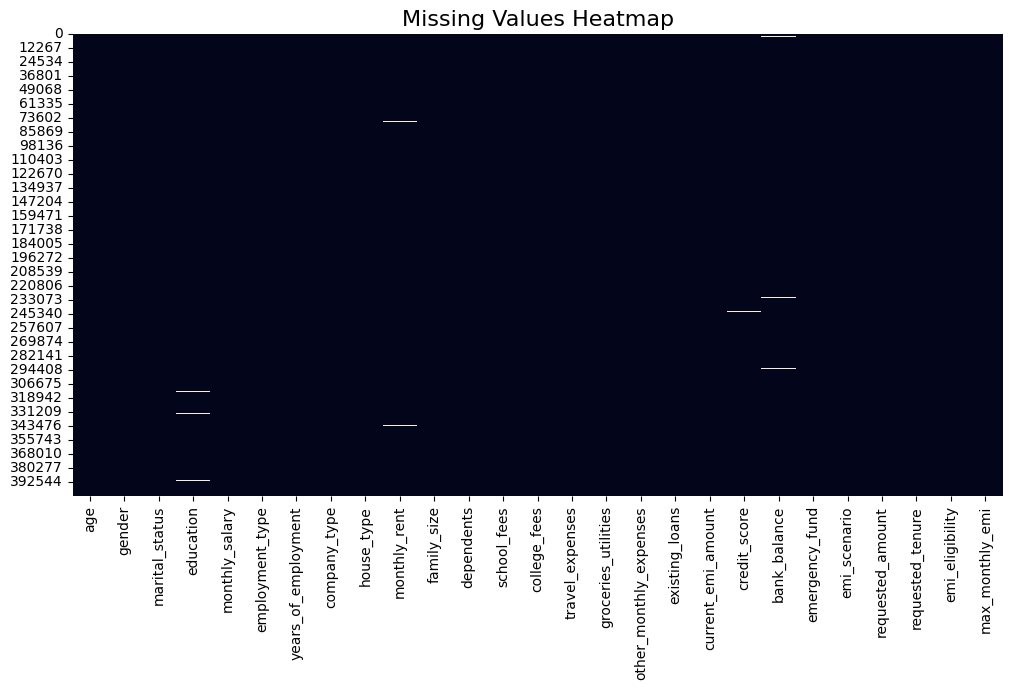

In [174]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [175]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [176]:
for col in df:
    print(col," : ")
    print("--------------------")
    print(df[col].describe())
    print()

age  : 
--------------------
count     404800.0
unique        41.0
top           38.0
freq       91577.0
Name: age, dtype: float64

gender  : 
--------------------
count     404800
unique         8
top         Male
freq      237427
Name: gender, dtype: object

marital_status  : 
--------------------
count      404800
unique          2
top       Married
freq       307837
Name: marital_status, dtype: object

education  : 
--------------------
count       402396
unique           4
top       Graduate
freq        181015
Name: education, dtype: object

monthly_salary  : 
--------------------
count      404800
unique      13662
top       18000.0
freq         4159
Name: monthly_salary, dtype: object

employment_type  : 
--------------------
count      404800
unique          3
top       Private
freq       283099
Name: employment_type, dtype: object

years_of_employment  : 
--------------------
count    404800.000000
mean          5.364079
std           6.079135
min           0.500000
25%       

In [177]:
df.describe()

,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,402374.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,402380.000000,402449.000000,4.048000e+05,404800.000000,404800.000000
mean,5.364079,5828.446490,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,4543.407609,700.856223,96769.051731,3.708554e+05,29.126677,6763.602156
std,6.079135,8648.604639,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,7034.901139,88.435548,81373.053976,3.451945e+05,18.100854,7741.263317
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,38400.000000,1.240000e+05,15.000000,500.000000
50%,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,74000.000000,2.360000e+05,25.000000,4211.200000
75%,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,130600.000000,4.940000e+05,40.000000,9792.000000
max,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,891500.000000,1.500000e+06,84.000000,91040.400000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [178]:
for col in df:
    print(col," : ",df[col].nunique())

age  :  41
gender  :  8
marital_status  :  2
education  :  4
monthly_salary  :  13662
employment_type  :  3
years_of_employment  :  356
company_type  :  5
house_type  :  3
monthly_rent  :  4396
family_size  :  5
dependents  :  5
school_fees  :  132
college_fees  :  202
travel_expenses  :  284
groceries_utilities  :  544
other_monthly_expenses  :  373
existing_loans  :  2
current_emi_amount  :  508
credit_score  :  427
bank_balance  :  12261
emergency_fund  :  5486
emi_scenario  :  5
requested_amount  :  1491
requested_tenure  :  82
emi_eligibility  :  3
max_monthly_emi  :  15383


## 3. ***Data Wrangling***

### Data Wrangling Code

In [179]:
# Initial exploration (head, info, describe, missing values) has already been done above.
# Detailed cleaning (handling missing values, fixing data types, removing duplicates, etc.) will be performed in the later Data Cleaning section.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

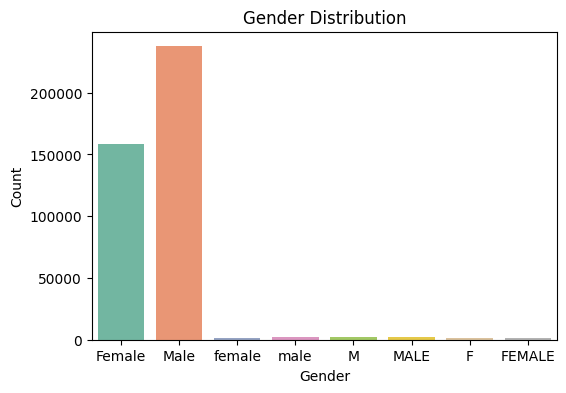

In [180]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='gender', data=df, palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

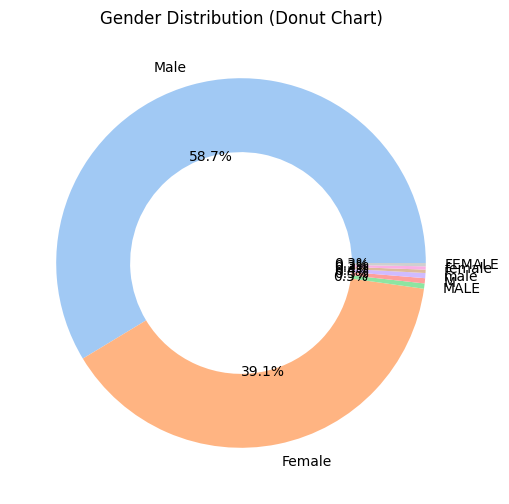

In [181]:
plt.figure(figsize=(6,6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
plt.title('Gender Distribution (Donut Chart)')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the gender distribution of customers applying for EMIs.

##### 2. What is/are the insight(s) found from the chart?

You can identify which gender segment dominates EMI applications.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — helps tailor financial marketing strategies toward the dominant gender group.

#### Chart - 2

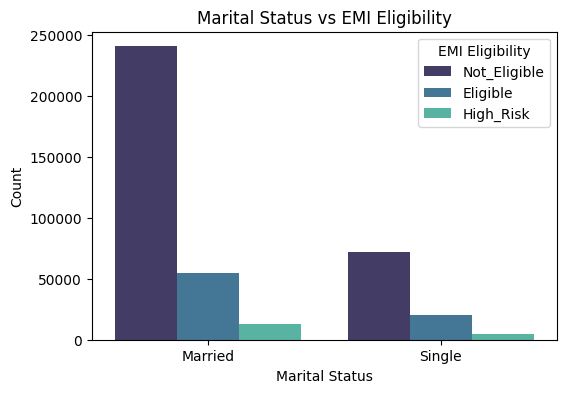

In [182]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital_status', hue='emi_eligibility', data=df, palette='mako')
plt.title('Marital Status vs EMI Eligibility')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='EMI Eligibility')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze whether marital status impacts EMI approval likelihood.

##### 2. What is/are the insight(s) found from the chart?

Married customers may show higher EMI eligibility due to joint income stability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — banks can offer customized joint EMI schemes for married applicants.

#### Chart - 3

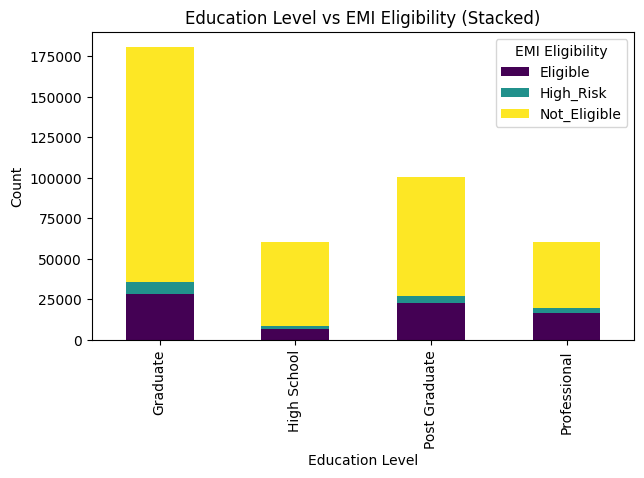

In [183]:
edu_emi = pd.crosstab(df['education'], df['emi_eligibility'])
edu_emi.plot(kind='bar', stacked=True, figsize=(7,4), colormap='viridis')
plt.title('Education Level vs EMI Eligibility (Stacked)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='EMI Eligibility')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how educational qualifications influence EMI eligibility.

##### 2. What is/are the insight(s) found from the chart?

Highly educated individuals may have higher EMI eligibility due to better financial stability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — useful for credit risk scoring models and targeted financial product promotions.

#### Chart - 4

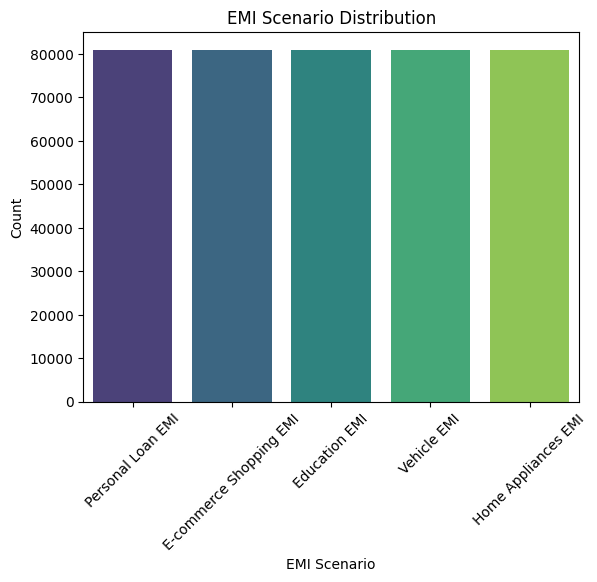

In [184]:
sns.countplot(x='emi_scenario', hue='emi_scenario', data=df, palette='viridis', legend=False)
plt.title('EMI Scenario Distribution')
plt.xlabel('EMI Scenario')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

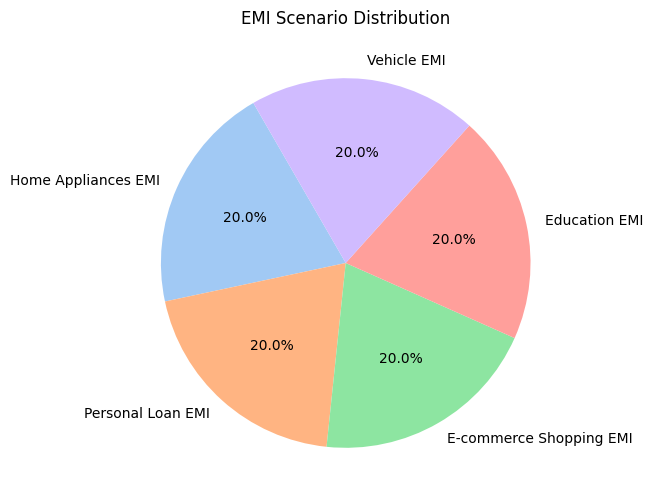

In [185]:
plt.figure(figsize=(6,6))
df['emi_scenario'].value_counts().plot.pie(autopct='%1.1f%%', startangle=120, colors=sns.color_palette('pastel'))
plt.title('EMI Scenario Distribution')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

To see how EMI requests are distributed across the five scenarios (e-commerce, appliances, vehicle, personal, education).

##### 2. What is/are the insight(s) found from the chart?

Shows which EMI scenario is most frequent and which are niche — useful for scenario-specific modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — helps prioritize product features and scenario-specific risk policies.

#### Chart - 5

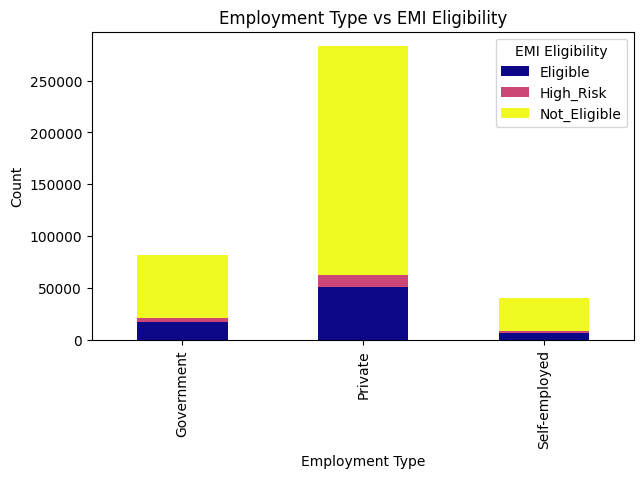

In [186]:
emp_emi = pd.crosstab(df['employment_type'], df['emi_eligibility'])
emp_emi.plot(kind='bar', stacked=True, figsize=(7,4), colormap='plasma')
plt.title('Employment Type vs EMI Eligibility')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='EMI Eligibility')
plt.show()

##### 1. Why did you pick the specific chart?

To assess whether job type affects EMI approval chances.

##### 2. What is/are the insight(s) found from the chart?

Government employees likely show higher EMI eligibility due to stable income.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — helps create risk-based pricing for self-employed vs salaried segments.

#### Chart - 6

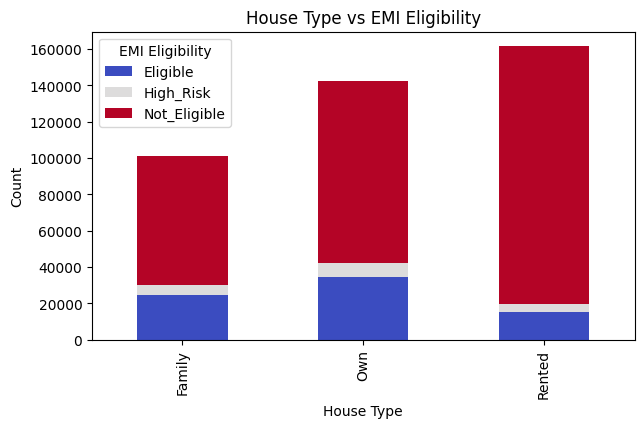

In [187]:
house_emi = pd.crosstab(df['house_type'], df['emi_eligibility'])
house_emi.plot(kind='bar', stacked=True, figsize=(7,4), colormap='coolwarm')
plt.title('House Type vs EMI Eligibility')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.legend(title='EMI Eligibility')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how different housing types (Rented, Own, Family) influence EMI eligibility among applicants.

##### 2. What is/are the insight(s) found from the chart?

Applicants living in owned or family houses tend to have higher EMI eligibility, while those in rented accommodations are more likely to fall into the high-risk or not-eligible categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — understanding this trend helps lenders adjust credit risk models and create tailored EMI plans for customers based on housing stability.

#### Chart - 7

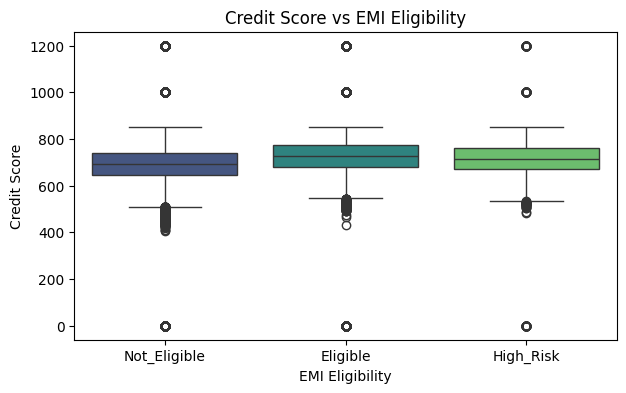

In [188]:
plt.figure(figsize=(7,4))
sns.boxplot(x='emi_eligibility', y='credit_score', hue='emi_eligibility', data=df, palette='viridis', legend=False)
plt.title('Credit Score vs EMI Eligibility')
plt.xlabel('EMI Eligibility')
plt.ylabel('Credit Score')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how an applicant’s credit score affects their EMI eligibility status.

##### 2. What is/are the insight(s) found from the chart?

Applicants with higher credit scores are mostly in the Eligible category, while those with low scores tend to fall into High_Risk or Not_Eligible groups. This shows a clear positive correlation between credit score and EMI approval chances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — lenders can use credit score thresholds to automate eligibility checks and design risk-based interest rates, improving both decision speed and credit risk management.

#### Chart - 8

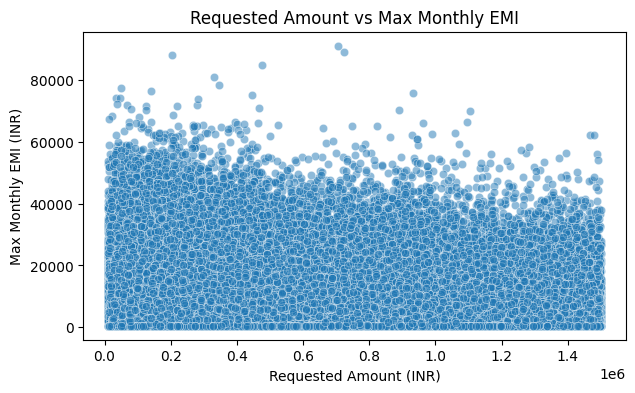

In [189]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='requested_amount', y='max_monthly_emi', data=df, alpha=0.5)
plt.title('Requested Amount vs Max Monthly EMI')
plt.xlabel('Requested Amount (INR)')
plt.ylabel('Max Monthly EMI (INR)')
plt.show()


##### 1. Why did you pick the specific chart?

To study how the amount requested by applicants relates to their maximum affordable monthly EMI as predicted by the model.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a positive relationship — as the requested loan amount increases, the maximum monthly EMI also tends to rise. However, some points deviate from this trend, indicating applicants who request more than what their financial profile can safely handle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this helps financial institutions identify over-leveraged applicants early and adjust loan approvals or suggest safer EMI plans, reducing default risk.

#### Chart - 9

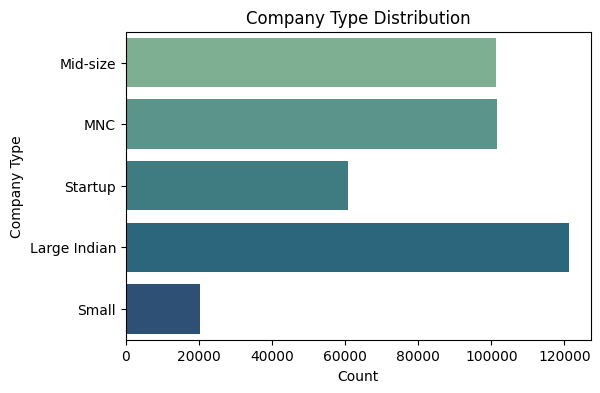

In [190]:
plt.figure(figsize=(6,4))
sns.countplot(y='company_type', hue='company_type', data=df, palette='crest', legend=False)
plt.title('Company Type Distribution')
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.show()


##### 1. Why did you pick the specific chart?

To compare the proportion of applicants across company types.

##### 2. What is/are the insight(s) found from the chart?

Private sector employees may dominate loan applications.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — lenders can adjust underwriting criteria for specific job categories.

#### Chart - 10

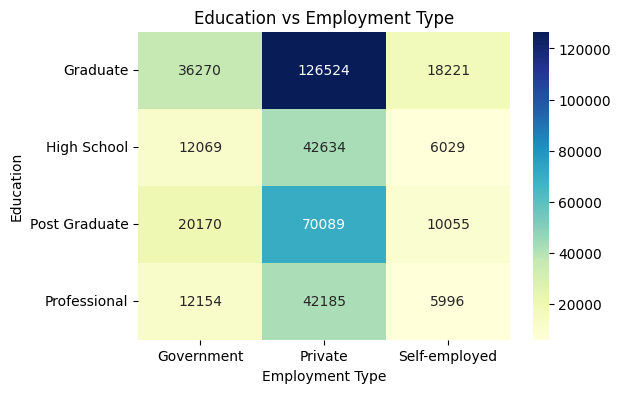

In [191]:
cross_tab = pd.crosstab(df['education'], df['employment_type'])
plt.figure(figsize=(6,4))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Education vs Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education')
plt.show()

##### 1. Why did you pick the specific chart?

To examine how education correlates with job type visually.

##### 2. What is/are the insight(s) found from the chart?

Certain education levels dominate specific employment categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — assists in designing segment-based credit offers.

#### Chart - 11

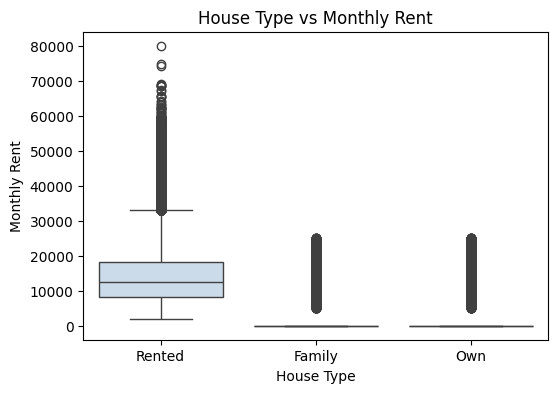

In [192]:
plt.figure(figsize=(6,4))
sns.boxplot(x='house_type', y='monthly_rent', hue='house_type', data=df, palette='Blues', legend=False)
plt.title('House Type vs Monthly Rent')
plt.xlabel('House Type')
plt.ylabel('Monthly Rent')
plt.show()


##### 1. Why did you pick the specific chart?

To study the variation of rent expenses across housing types.

##### 2. What is/are the insight(s) found from the chart?

People in rented houses may have higher expenses impacting EMI capacity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — useful in adjusting loan limits based on housing expenses.

#### Chart - 12

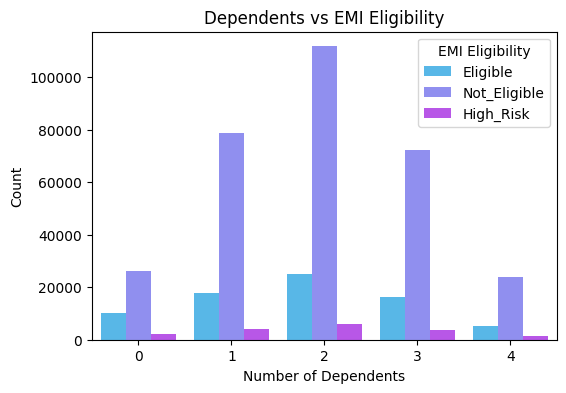

In [193]:
plt.figure(figsize=(6,4))
sns.countplot(x='dependents', hue='emi_eligibility', data=df, palette='cool')
plt.title('Dependents vs EMI Eligibility')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='EMI Eligibility')
plt.show()

##### 1. Why did you pick the specific chart?

To check if more dependents reduce EMI eligibility chances.


##### 2. What is/are the insight(s) found from the chart?

Applicants with more dependents may fall under higher risk categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — helps lenders fine-tune eligibility rules for high-dependency families.

#### Chart - 13

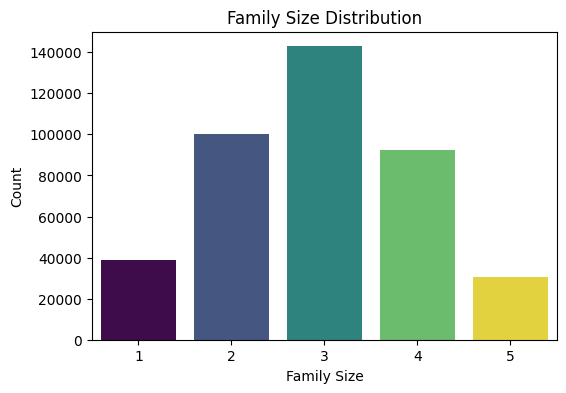

In [194]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_size', hue='family_size', data=df, palette='viridis', legend=False)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the family size pattern among EMI applicants.

##### 2. What is/are the insight(s) found from the chart?

Most applicants have small to medium family sizes, indicating moderate financial dependency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — helps banks assess risk based on family responsibilities.

#### Chart - 14 - Correlation Heatmap

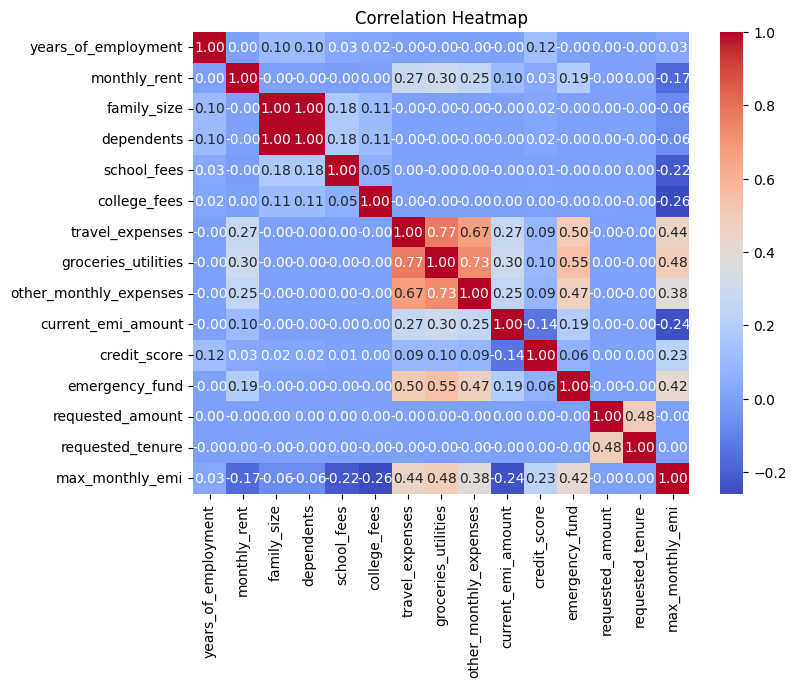

In [195]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

To identify linear relationships between important numerical financial features like salary, credit score, expenses, and EMI amount.
It helps reveal which variables are most correlated and influence the target outcomes.

##### 2. What is/are the insight(s) found from the chart?

High positive correlation between monthly_salary and max_monthly_emi.

Negative or weak correlations with other_monthly_expenses or existing_loans, indicating risk contributors.

Credit_score also correlates moderately with EMI eligibility factors.

#### Chart - 15 - Pair Plot

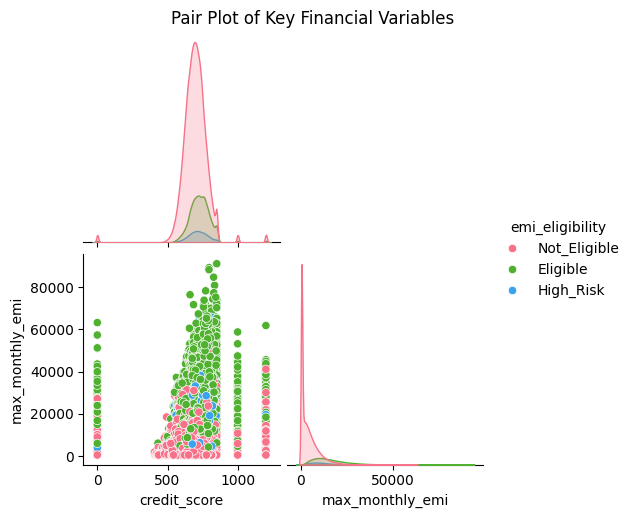

In [196]:
selected_cols = ['monthly_salary', 'credit_score', 'age', 'max_monthly_emi', 'emi_eligibility']
sns.pairplot(df[selected_cols], hue='emi_eligibility', palette='husl', corner=True)
plt.suptitle('Pair Plot of Key Financial Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To explore pairwise relationships among the most significant variables — age, salary, credit score, and EMI — across eligibility categories.
It helps detect clustering patterns and separation between risk groups visually.

##### 2. What is/are the insight(s) found from the chart?

Clear positive trends between salary and max_monthly_emi.

Distinct groupings for emi_eligibility, where “Not Eligible” clusters around lower salary and credit score values.

Some mild overlaps show complex financial interdependencies.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [197]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [198]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [199]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [200]:
df.shape

(404800, 27)

In [201]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

### 1. Handling Missing Values

In [202]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [203]:
# Using Mode Imputation -
#       To keep the dataset size intact
#       Avoids potential bias from dropping thousands of valid financial records.

In [204]:
df['education'].value_counts()

education
Graduate         181015
Post Graduate    100314
High School       60732
Professional      60335
Name: count, dtype: int64

In [205]:
df['monthly_rent'].value_counts()


monthly_rent
0.0        237343
9400.0       1061
8900.0       1056
9000.0       1051
8600.0       1042
            ...  
22892.0         1
22939.0         1
15566.0         1
15374.0         1
13740.0         1
Name: count, Length: 4396, dtype: int64

In [206]:
df['credit_score'].value_counts()

credit_score
850.0    6449
706.0    2390
691.0    2382
703.0    2375
698.0    2334
         ... 
447.0       1
442.0       1
433.0       1
441.0       1
431.0       1
Name: count, Length: 427, dtype: int64

In [207]:
df['bank_balance'].value_counts()

bank_balance
115800.0      160
107700.0      156
86200.0       152
101700.0      149
97800.0       149
             ... 
1255100.0       1
276300.0.0      1
1351900.0       1
1088600.0       1
903600.0        1
Name: count, Length: 12261, dtype: int64

In [208]:
df['emergency_fund'].value_counts()

emergency_fund
29100.0     369
24200.0     365
33800.0     364
20700.0     364
28800.0     362
           ... 
490000.0      1
447100.0      1
504900.0      1
538600.0      1
506000.0      1
Name: count, Length: 5486, dtype: int64

In [209]:
df.dtypes

age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object

In [210]:
df.fillna({'monthly_rent': df['monthly_rent'].mean()}, inplace=True)

In [211]:
df.fillna({'credit_score': df['credit_score'].mean()}, inplace=True)

In [212]:
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df.fillna({'bank_balance': df['bank_balance'].mean()}, inplace=True)

In [213]:
df.fillna({'education': df['education'].mode()[0]}, inplace=True)


In [214]:
df.fillna({'emergency_fund': df['emergency_fund'].mean()}, inplace=True)

In [215]:
df[:3]

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0


In [216]:
df.isna().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

In [217]:
for col in df:
    print(col," : ",df[col].unique())

age  :  [38.0 58.0 48.0 32.0 27.0 47.0 37.0 31.0 59.0 49.0 33.0 26.0 39.0 57.0
 28.0 '58' '38' '48' '32' '27' '37' '48.0' '33' '38.0' '49' '27.0' '31'
 '39' '47' '59' '32.0' '58.0' '57' '26' '28' '58.0.0' '39.0' '26.0' '37.0'
 '38.0.0' '32.0.0']
gender  :  ['Female' 'Male' 'female' 'male' 'M' 'MALE' 'F' 'FEMALE']
marital_status  :  ['Married' 'Single']
education  :  ['Professional' 'Graduate' 'High School' 'Post Graduate']
monthly_salary  :  ['82600.0' '21500.0' '86100.0' ... '56779.0' '56280.0' '55905.0']
employment_type  :  ['Private' 'Government' 'Self-employed']
years_of_employment  :  [ 0.9  7.   5.8  2.2  3.4  5.  36.  12.9  1.9  7.5  3.7  1.3  3.2  0.5
 26.   0.8  4.2  2.6  3.9  9.7  4.7  9.6  1.7  9.4  4.1  1.   7.6 16.
  2.5  1.6 17.1  6.6 12.6  2.3  4.5 11.3 10.   0.7  3.   2.1  2.7  0.6
  8.6  5.9  8.4 12.4  2.8 15.9 10.2  1.2  1.5 14.   1.1  6.5  7.4  7.2
 20.7 17.6 16.6 10.9 20.6 29.7  8.5 10.8 14.2  9.9 24.3  9.1 11.4 11.8
  2.   6.2  6.9  5.2 11.7 18.1  8.2  3.1  3.3  7.

In [218]:
df.dtypes

age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance              float64
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object

In [219]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [220]:
# Fix gender inconsistency
df['gender'] = df['gender'].str.lower().replace({
    'm': 'male', 'male': 'male', 'f': 'female', 'female': 'female',
    'MALE': 'male', 'FEMALE': 'female'
})

In [221]:
# Standardize string columns
for col in ['marital_status','education','employment_type','company_type',
            'house_type','existing_loans','emi_scenario']:
    df[col] = df[col].astype(str).str.strip().str.title()

In [222]:
# Convert existing_loans to numeric
df['existing_loans'] = df['existing_loans'].map({'Yes': 1, 'No': 0}).fillna(0)

In [223]:
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')

In [224]:
# --- Debt-to-Income ratio ---
df['debt_to_income'] = df['current_emi_amount'] / (df['monthly_salary'] + 1)

In [225]:
# --- Total monthly expenses ---
df['total_expenses'] = (df['school_fees'] + df['college_fees'] +
                        df['travel_expenses'] + df['groceries_utilities'] +
                        df['other_monthly_expenses'])
df.drop(columns=['school_fees','college_fees','travel_expenses','groceries_utilities','other_monthly_expenses'], inplace=True)

In [226]:
# --- Expense-to-Income ratio ---
df['expense_to_income'] = df['total_expenses'] / (df['monthly_salary'] + 1)

In [227]:
# --- Affordability ratio (savings vs loan amount) ---
df['affordability_ratio'] = df['bank_balance'] / (df['requested_amount'] + 1)

In [228]:
# --- Employment stability (experience vs age) ---
df['emp_stability'] = df['years_of_employment'] / (df['age'] + 1)

In [229]:
X=df.drop({"emi_eligibility","max_monthly_emi"}, axis=1)
y=df[["emi_eligibility","max_monthly_emi"]]

In [230]:
X.dtypes

age                    float64
gender                  object
marital_status          object
education               object
monthly_salary         float64
employment_type         object
years_of_employment    float64
company_type            object
house_type              object
monthly_rent           float64
family_size              int64
dependents               int64
existing_loans           int64
current_emi_amount     float64
credit_score           float64
bank_balance           float64
emergency_fund         float64
emi_scenario            object
requested_amount       float64
requested_tenure         int64
debt_to_income         float64
total_expenses         float64
expense_to_income      float64
affordability_ratio    float64
emp_stability          float64
dtype: object

In [231]:
X[:3]

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,debt_to_income,total_expenses,expense_to_income,affordability_ratio,emp_stability
0,38.0,female,Married,Professional,82600.0,Private,0.9,Mid-Size,Rented,20000.0,...,303200.0,70200.0,Personal Loan Emi,850000.0,15,0.286921,39900.0,0.483045,0.356705,0.023077
1,38.0,female,Married,Graduate,21500.0,Private,7.0,Mnc,Family,0.0,...,92500.0,26900.0,E-Commerce Shopping Emi,128000.0,19,0.190689,15400.0,0.716246,0.722651,0.179487
2,38.0,male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,672100.0,324200.0,Education Emi,306000.0,16,0.000000,35600.0,0.413468,2.196398,0.148718


### 2. Handling Outliers

In [232]:
numcols = list(X.select_dtypes(include=["int64", "float64"]).columns)
numcols.remove('existing_loans')
numcols

['age',
 'monthly_salary',
 'years_of_employment',
 'monthly_rent',
 'family_size',
 'dependents',
 'current_emi_amount',
 'credit_score',
 'bank_balance',
 'emergency_fund',
 'requested_amount',
 'requested_tenure',
 'debt_to_income',
 'total_expenses',
 'expense_to_income',
 'affordability_ratio',
 'emp_stability']

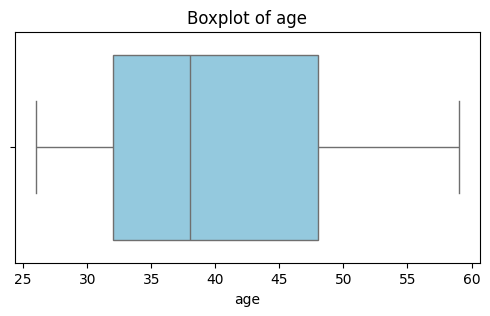

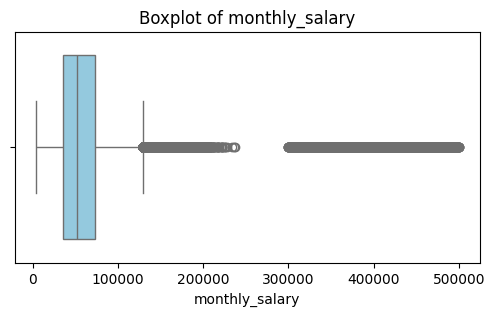

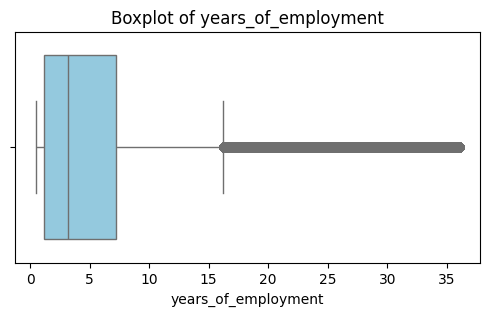

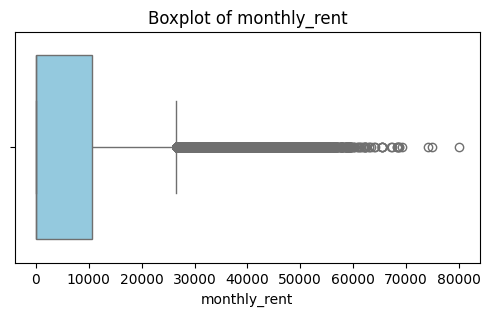

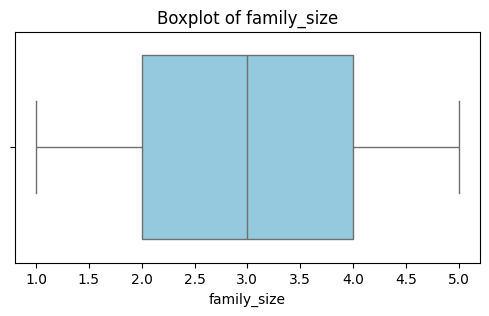

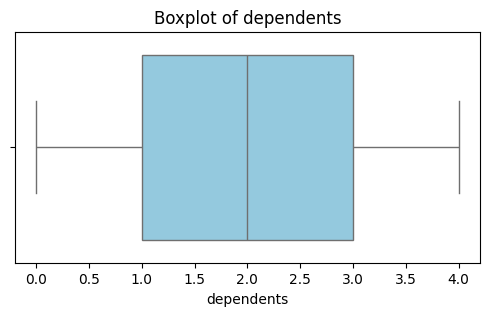

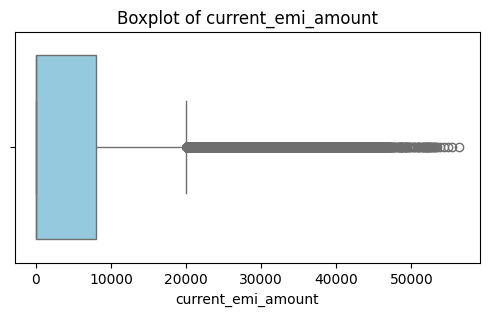

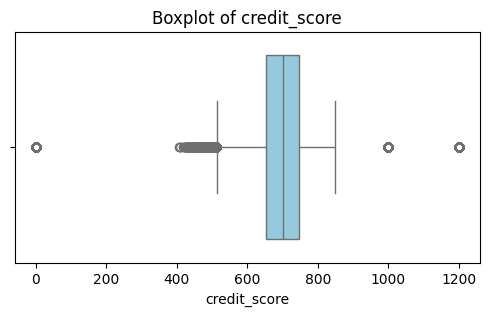

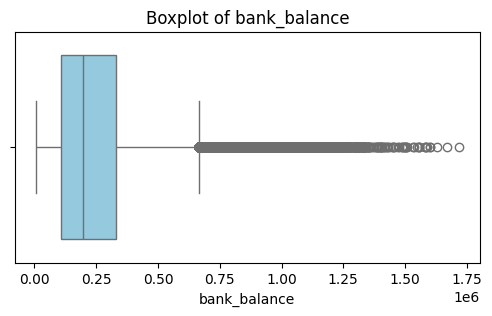

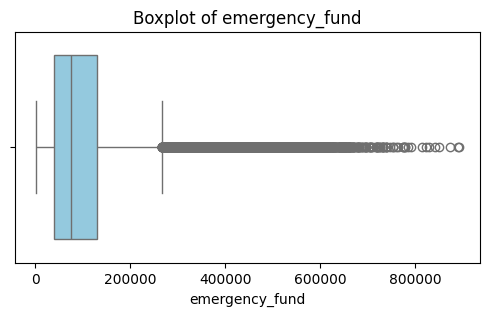

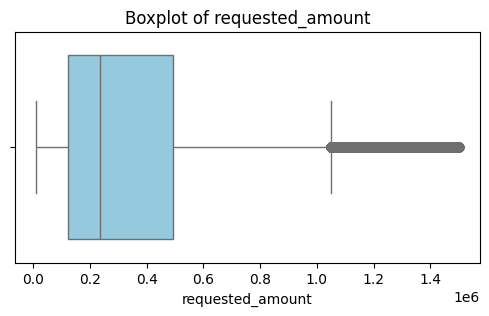

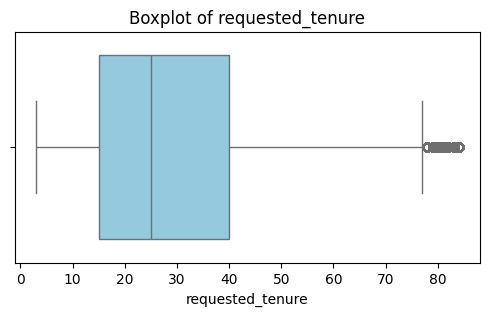

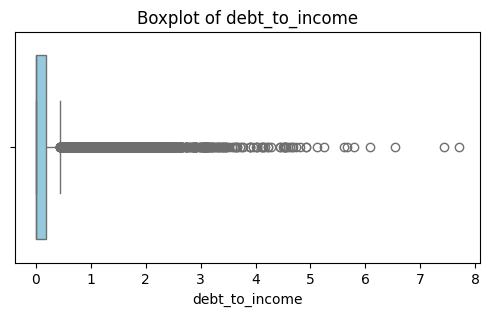

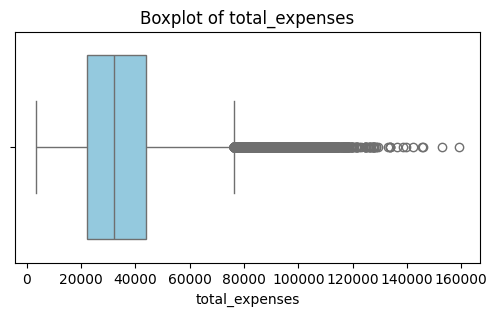

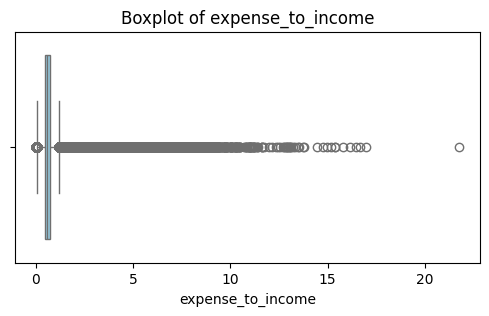

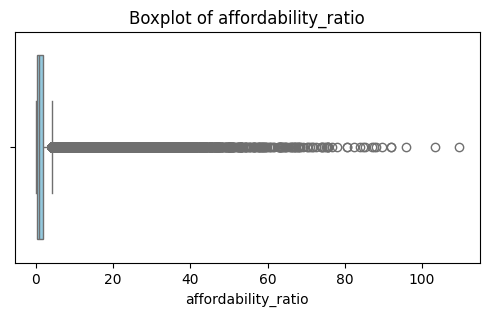

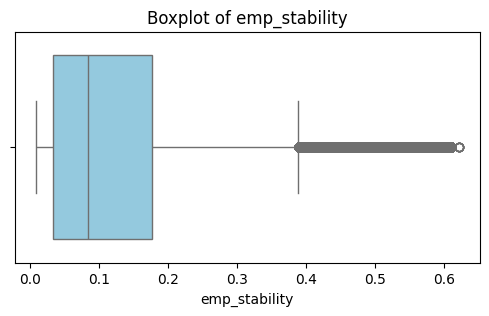

In [233]:
for col in numcols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

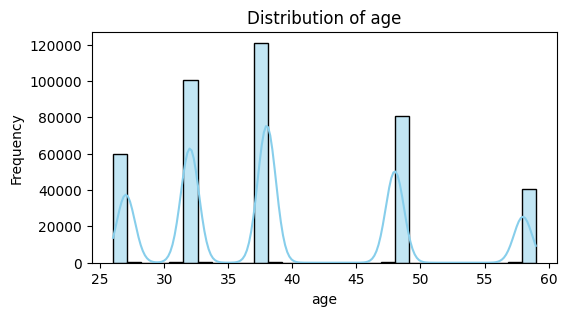

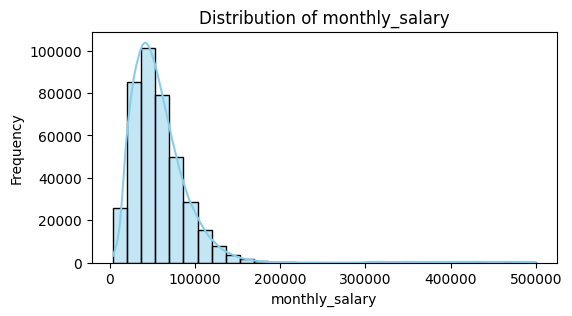

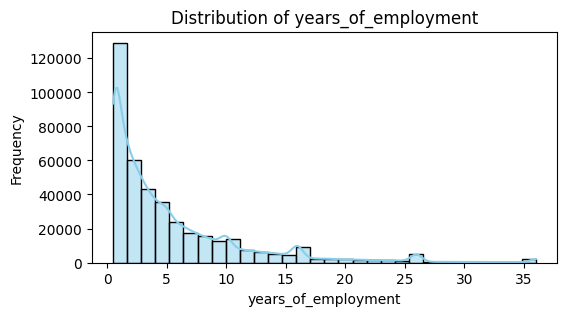

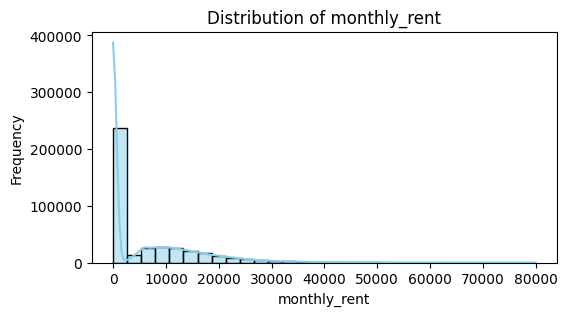

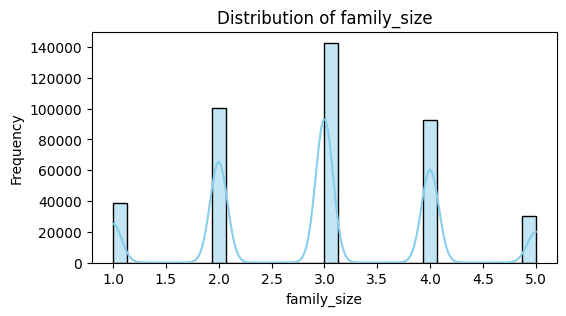

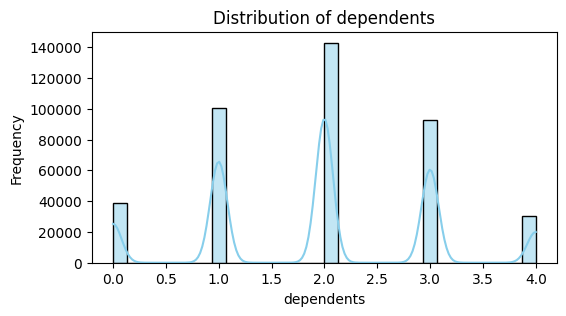

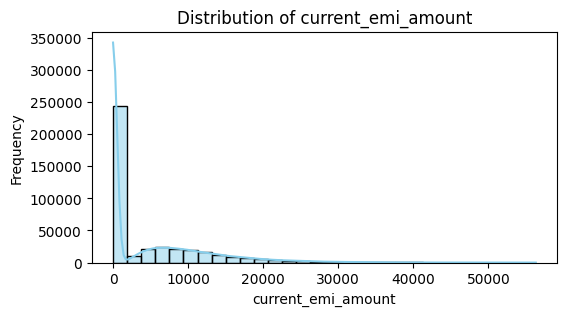

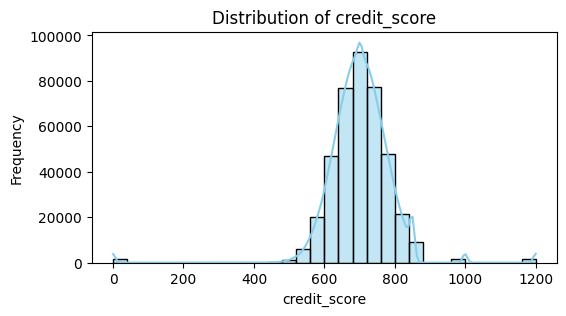

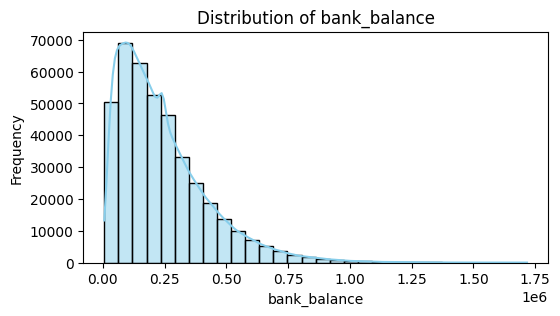

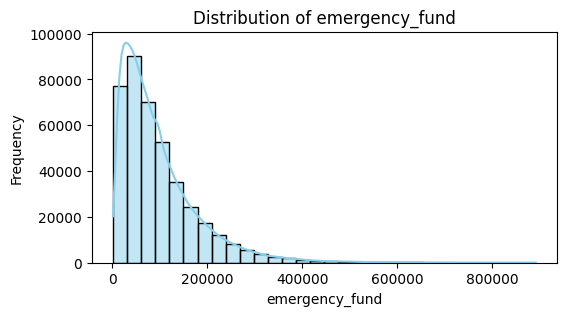

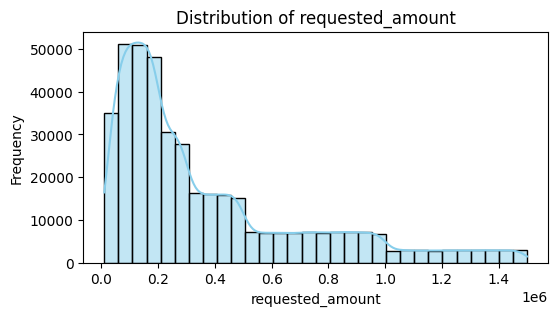

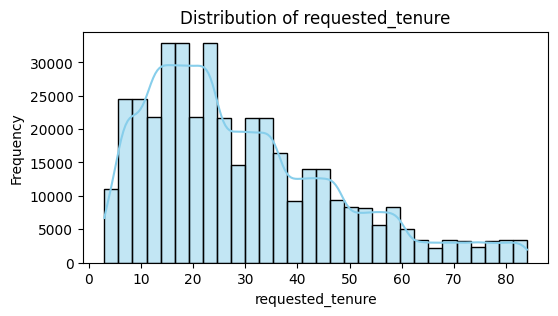

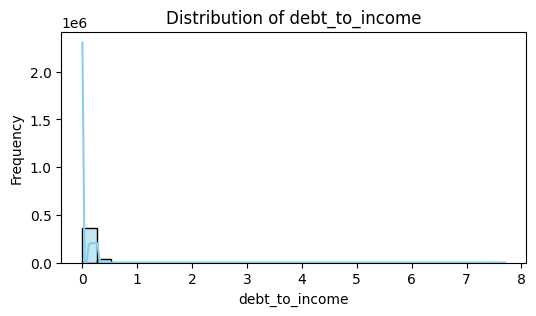

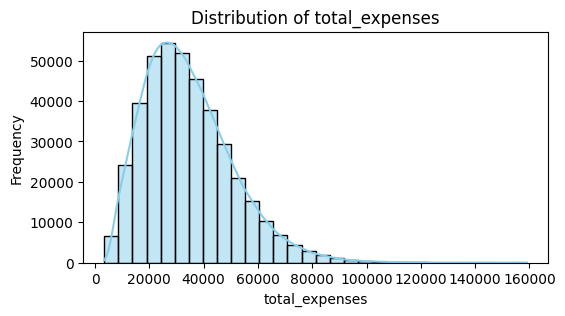

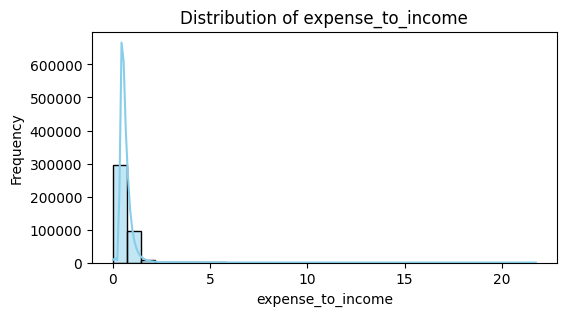

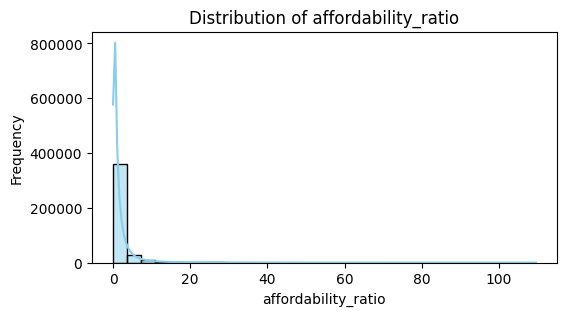

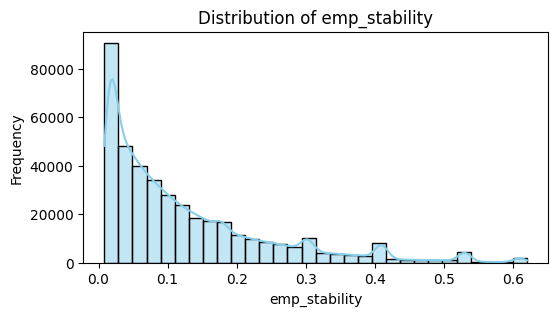

In [234]:
for col in numcols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [235]:
def meanmed(X):
    print("MEAN :", round(X.mean(), 2))
    print("MEDIAN :", X.median())
    print("DIFFERENCE :", round(X.mean(), 2) - X.median())

for col in numcols:
    print(f"Statistics for column: {col}")
    meanmed(X[col])
    print()

Statistics for column: age
MEAN : 38.88
MEDIAN : 38.0
DIFFERENCE : 0.8800000000000026

Statistics for column: monthly_salary
MEAN : 59509.34
MEDIAN : 51700.0
DIFFERENCE : 7809.3399999999965

Statistics for column: years_of_employment
MEAN : 5.36
MEDIAN : 3.2
DIFFERENCE : 2.16

Statistics for column: monthly_rent
MEAN : 5828.45
MEDIAN : 0.0
DIFFERENCE : 5828.45

Statistics for column: family_size
MEAN : 2.94
MEDIAN : 3.0
DIFFERENCE : -0.06000000000000005

Statistics for column: dependents
MEAN : 1.94
MEDIAN : 2.0
DIFFERENCE : -0.06000000000000005

Statistics for column: current_emi_amount
MEAN : 4543.41
MEDIAN : 0.0
DIFFERENCE : 4543.41

Statistics for column: credit_score
MEAN : 700.86
MEDIAN : 700.8562229733088
DIFFERENCE : 0.0037770266911820727

Statistics for column: bank_balance
MEAN : 241664.16
MEDIAN : 198300.0
DIFFERENCE : 43364.16

Statistics for column: emergency_fund
MEAN : 96769.05
MEDIAN : 74500.0
DIFFERENCE : 22269.050000000003

Statistics for column: requested_amount
MEAN

In [236]:
def treat_outliers_iqr(X, col):
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

In [237]:
# --- Columns that have outliers ---
outlier_cols = [
    'monthly_salary', 'years_of_employment', 'monthly_rent',
    'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
    'requested_amount', 'requested_tenure', 'debt_to_income',
    'total_expenses', 'expense_to_income', 'affordability_ratio', 'emp_stability'
]

In [238]:
# --- Apply function to each column ---
for col in outlier_cols:
    treat_outliers_iqr(X, col)

In [239]:
X.shape

(404800, 25)

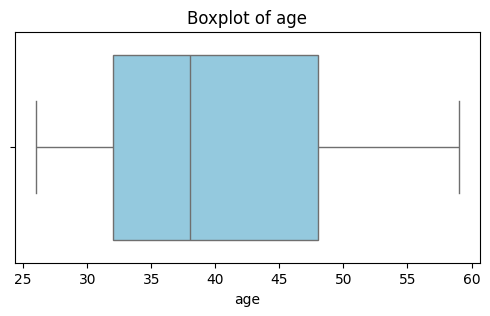

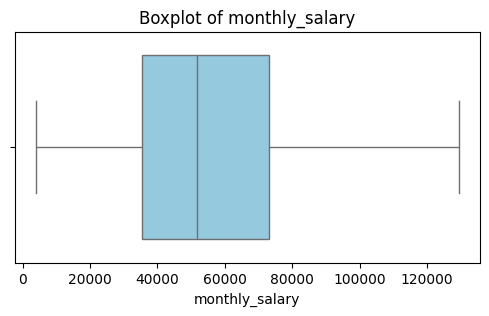

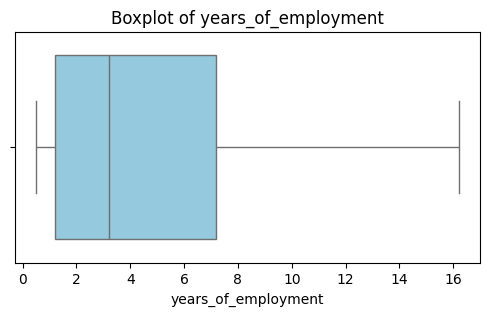

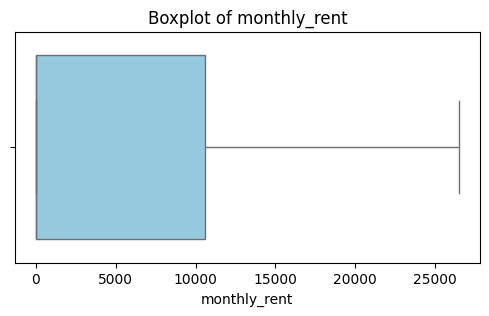

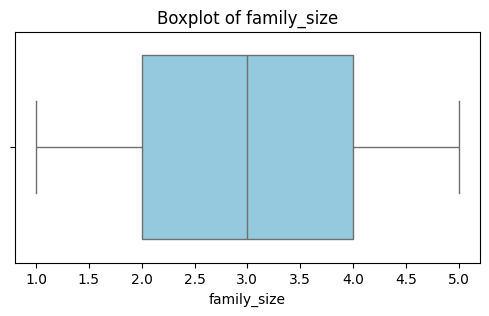

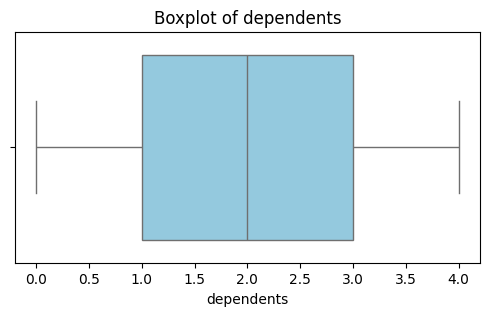

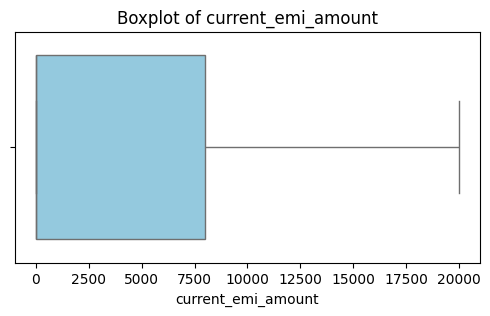

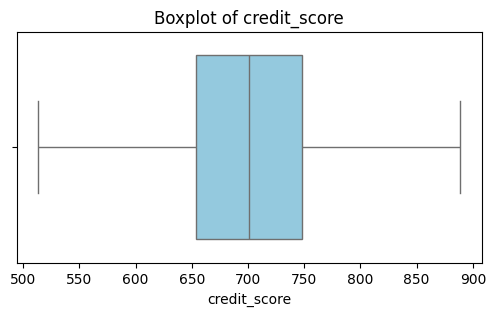

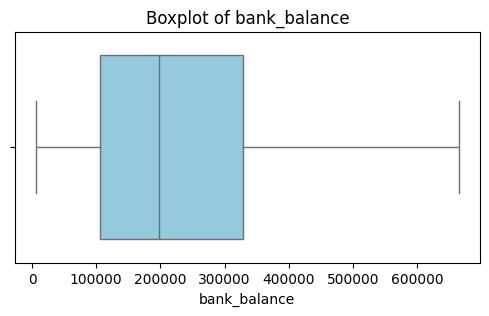

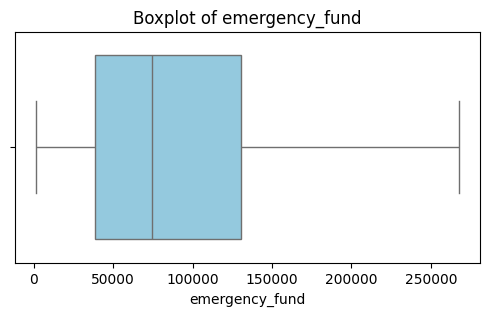

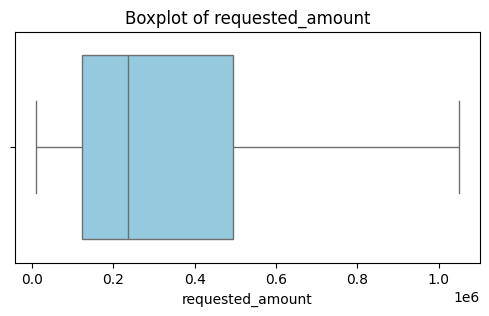

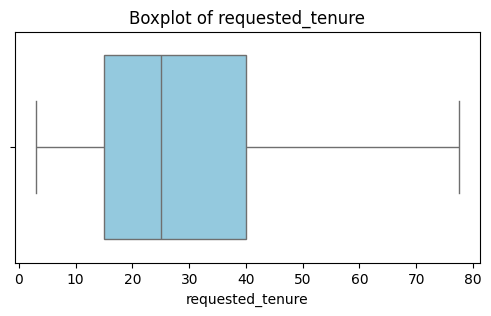

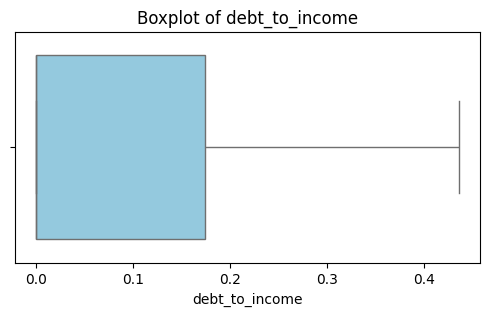

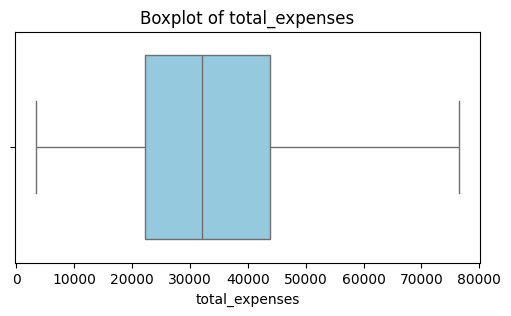

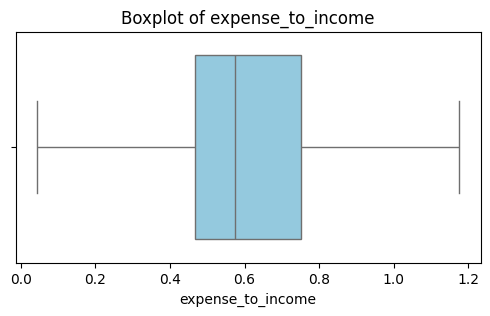

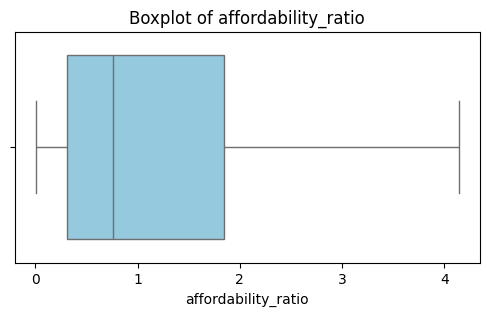

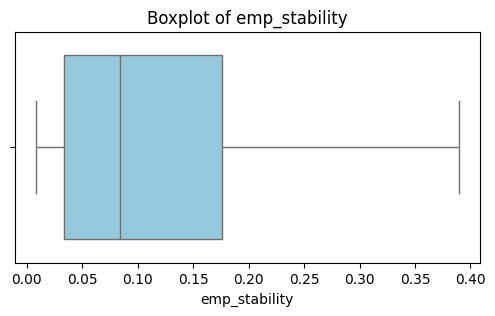

In [240]:
for col in numcols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [241]:
catcols = list(X.select_dtypes(exclude=["int64", "float64"]).columns)
catcols.append("existing_loans")
catcols

['gender',
 'marital_status',
 'education',
 'employment_type',
 'company_type',
 'house_type',
 'emi_scenario',
 'existing_loans']

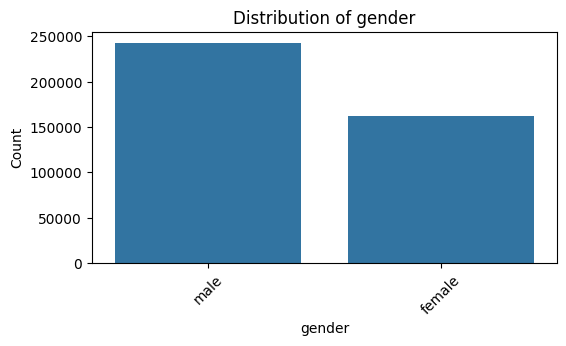

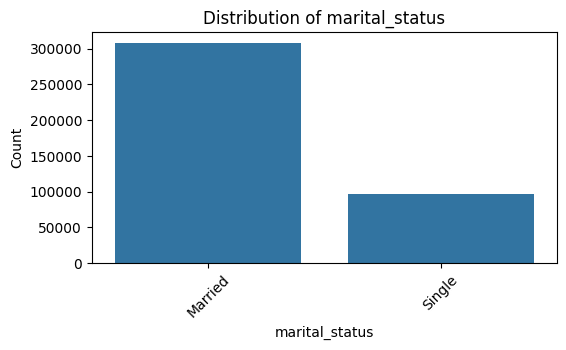

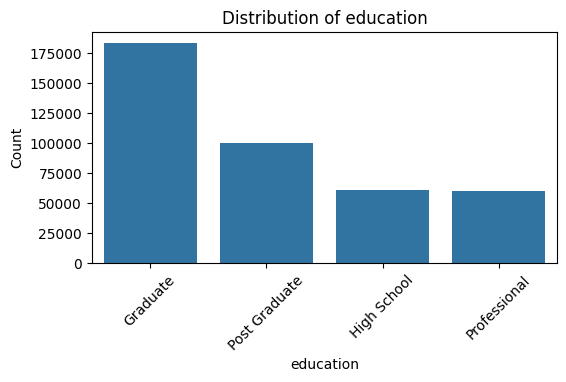

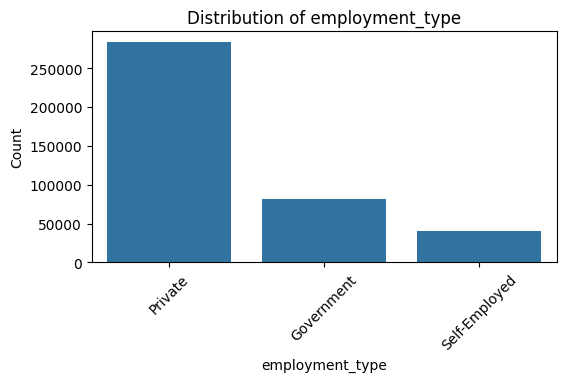

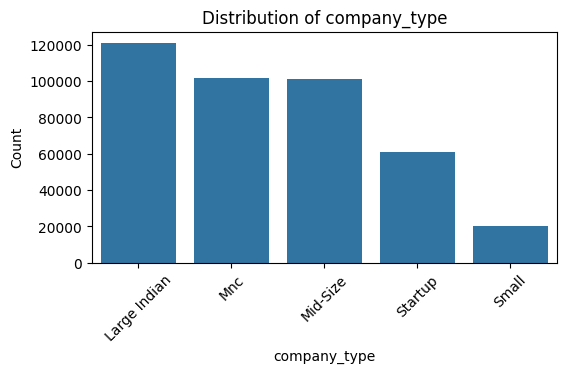

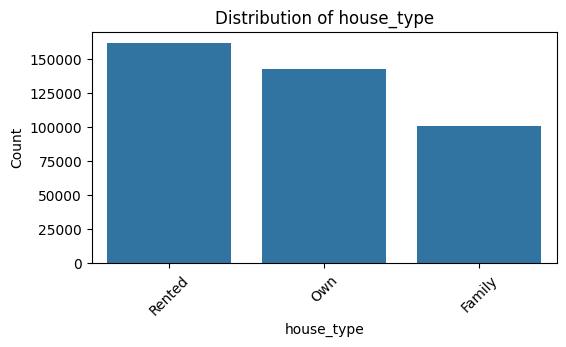

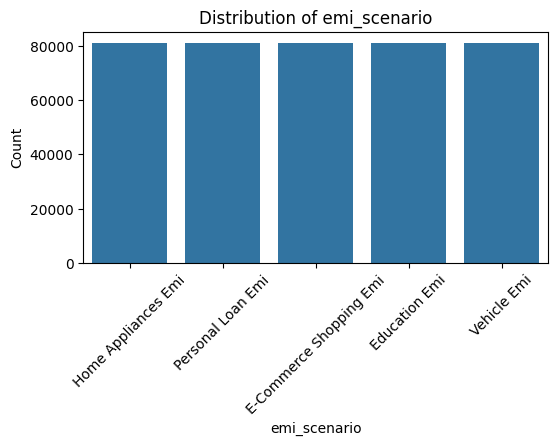

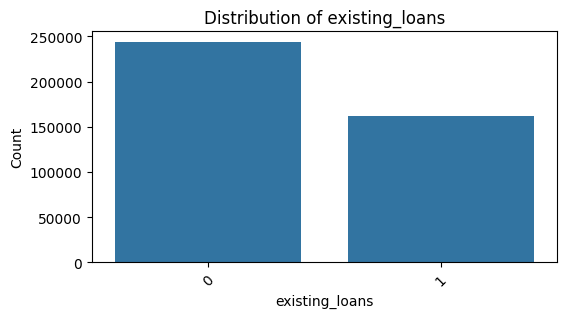

In [242]:
# Plot each column one by one
for col in catcols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=X[col], order=X[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [243]:
binary_cols=['gender', 'marital_status']
le=LabelEncoder()
for col in binary_cols:
    X[col]=le.fit_transform(X[col])
print(f"label encoding done for {binary_cols}")

label encoding done for ['gender', 'marital_status']


In [244]:
from sklearn.preprocessing import OrdinalEncoder
education_order=[['High School','Graduate','Post Graduate','Professional']]
edu_enc = OrdinalEncoder(categories=education_order)
X[['education']] = edu_enc.fit_transform(X[['education']])
print("Ordinal Encoding done for: education")

Ordinal Encoding done for: education


In [245]:
nominal_cols = ['employment_type', 'company_type', 'house_type','emi_scenario']
X = pd.get_dummies(X, columns=nominal_cols, drop_first=True)
print(f"One-Hot Encoding done for:{nominal_cols}")

One-Hot Encoding done for:['employment_type', 'company_type', 'house_type', 'emi_scenario']


In [246]:
# Convert all boolean columns to 0 and 1
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

print("Converted all boolean columns to 0/1 numeric format.")

Converted all boolean columns to 0/1 numeric format.


In [247]:
X.dtypes

age                                 float64
gender                                int64
marital_status                        int64
education                           float64
monthly_salary                      float64
years_of_employment                 float64
monthly_rent                        float64
family_size                           int64
dependents                            int64
existing_loans                        int64
current_emi_amount                  float64
credit_score                        float64
bank_balance                        float64
emergency_fund                      float64
requested_amount                    float64
requested_tenure                    float64
debt_to_income                      float64
total_expenses                      float64
expense_to_income                   float64
affordability_ratio                 float64
emp_stability                       float64
employment_type_Private               int64
employment_type_Self-Employed   

In [248]:
X.shape

(404800, 33)

In [249]:
X.head()

,age,gender,marital_status,education,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,existing_loans,...,company_type_Mid-Size,company_type_Mnc,company_type_Small,company_type_Startup,house_type_Own,house_type_Rented,emi_scenario_Education Emi,emi_scenario_Home Appliances Emi,emi_scenario_Personal Loan Emi,emi_scenario_Vehicle Emi
0,38.0,0,0,3.0,82600.0,0.9,20000.0,3,2,1,...,1,0,0,0,0,1,0,0,1,0
1,38.0,0,0,1.0,21500.0,7.0,0.0,2,1,1,...,0,1,0,0,0,0,0,0,0,0
2,38.0,1,0,3.0,86100.0,5.8,0.0,4,3,0,...,0,0,0,1,1,0,1,0,0,0
3,58.0,0,0,0.0,66800.0,2.2,0.0,5,4,0,...,1,0,0,0,1,0,0,0,0,1
4,48.0,0,0,3.0,57300.0,3.4,0.0,4,3,0,...,1,0,0,0,0,0,0,1,0,0


In [250]:
X.isna().sum()

age                                    3
gender                                 0
marital_status                         0
education                              0
monthly_salary                      1993
years_of_employment                    0
monthly_rent                           0
family_size                            0
dependents                             0
existing_loans                         0
current_emi_amount                     0
credit_score                           0
bank_balance                           0
emergency_fund                         0
requested_amount                       0
requested_tenure                       0
debt_to_income                      1993
total_expenses                         0
expense_to_income                   1993
affordability_ratio                    0
emp_stability                          3
employment_type_Private                0
employment_type_Self-Employed          0
company_type_Mid-Size                  0
company_type_Mnc

In [251]:
X['monthly_salary']

0         82600.0
1         21500.0
2         86100.0
3         66800.0
4         57300.0
           ...   
404795    32400.0
404796    49200.0
404797    25700.0
404798    47200.0
404799    34900.0
Name: monthly_salary, Length: 404800, dtype: float64

In [252]:
X.fillna({'age': X['age'].mean(),'monthly_salary': X['monthly_salary'].mean(),'debt_to_income': X['debt_to_income'].mean(),'expense_to_income': X['expense_to_income'].mean(),'emp_stability': X['emp_stability'].mean()}, inplace=True)

In [253]:
X.isna().sum()

age                                 0
gender                              0
marital_status                      0
education                           0
monthly_salary                      0
years_of_employment                 0
monthly_rent                        0
family_size                         0
dependents                          0
existing_loans                      0
current_emi_amount                  0
credit_score                        0
bank_balance                        0
emergency_fund                      0
requested_amount                    0
requested_tenure                    0
debt_to_income                      0
total_expenses                      0
expense_to_income                   0
affordability_ratio                 0
emp_stability                       0
employment_type_Private             0
employment_type_Self-Employed       0
company_type_Mid-Size               0
company_type_Mnc                    0
company_type_Small                  0
company_type

In [286]:
X.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'years_of_employment', 'monthly_rent', 'family_size', 'dependents',
       'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance',
       'emergency_fund', 'requested_amount', 'requested_tenure',
       'debt_to_income', 'total_expenses', 'expense_to_income',
       'affordability_ratio', 'emp_stability', 'employment_type_Private',
       'employment_type_Self-Employed', 'company_type_Mid-Size',
       'company_type_Mnc', 'company_type_Small', 'company_type_Startup',
       'house_type_Own', 'house_type_Rented', 'emi_scenario_Education Emi',
       'emi_scenario_Home Appliances Emi', 'emi_scenario_Personal Loan Emi',
       'emi_scenario_Vehicle Emi'],
      dtype='object')

In [254]:
y.loc[:, 'emi_eligibility'] = le.fit_transform(y['emi_eligibility'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [255]:
# NA

#### 2. Lower Casing

In [256]:
# NA

#### 3. Removing Punctuations

In [257]:
# NA

#### 4. Removing URLs & Removing words and digits contain digits.

In [258]:
# NA

#### 5. Removing Stopwords & Removing White spaces

In [259]:
# NA

#### 6. Rephrase Text

In [260]:
# NA

#### 7. Tokenization

In [261]:
# NA

#### 8. Text Normalization

In [262]:
# NA

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

In [263]:
# NA

#### 10. Text Vectorization

In [264]:
# NA

##### Which text vectorization technique have you used and why?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

In [265]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [266]:
y_class = y['emi_eligibility']
y_reg = y['max_monthly_emi']

In [267]:
y_class= y_class.astype(int)

In [268]:
# For classification target
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [269]:
# For regression target
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(
    X_scaled, y_reg, test_size=0.2, random_state=42
)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [270]:
# For unsupervised learning, you generally do not need to handle imbalance 
# unless you are evaluating cluster quality against a reference label and find that one group is highly underrepresented. 

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

## CLASSIFICATION — EMI ELIGIBILITY

### ML Model - 1

In [271]:
def evaluate_classification(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n{model_name} Results:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")

In [272]:
log_clf = LogisticRegression(solver='saga', max_iter=2000, random_state=42)
log_clf.fit(x_train_c, y_train_c)
y_pred_log = log_clf.predict(x_test_c)
evaluate_classification(y_test_c, y_pred_log, 'Logistic Regression')


Logistic Regression Results:
Accuracy : 0.9092
Precision: 0.5827
Recall   : 0.6101
F1-Score : 0.5961


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [273]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(x_train_c, y_train_c)
y_pred_rf = rf_clf.predict(x_test_c)
evaluate_classification(y_test_c, y_pred_rf, 'Random Forest Classifier')


Random Forest Classifier Results:
Accuracy : 0.9339
Precision: 0.9133
Recall   : 0.6380
F1-Score : 0.6342


In [274]:
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(x_train_c, y_train_c)
y_pred_rf = rf_clf.predict(x_test_c)
evaluate_classification(y_test_c, y_pred_rf, 'Random Forest Classifier')


Random Forest Classifier Results:
Accuracy : 0.9314
Precision: 0.9143
Recall   : 0.6325
F1-Score : 0.6320


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [275]:
xgb_clf = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6,
                        subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_clf.fit(x_train_c, y_train_c)
y_pred_xgb = xgb_clf.predict(x_test_c)
evaluate_classification(y_test_c, y_pred_xgb, 'XGBoost Classifier')


XGBoost Classifier Results:
Accuracy : 0.9495
Precision: 0.8208
Recall   : 0.6601
F1-Score : 0.6463


In [276]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_clf.fit(x_train_c, y_train_c)
y_pred_xgb = xgb_clf.predict(x_test_c)
evaluate_classification(y_test_c, y_pred_xgb, 'XGBoost Classifier')


XGBoost Classifier Results:
Accuracy : 0.9579
Precision: 0.8899
Recall   : 0.7227
F1-Score : 0.7477


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## REGRESSION TASK

### ML Model-1

In [277]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_r, y_train_r)
y_pred_lin = lin_reg.predict(x_test_r)

# Metrics
mae = mean_absolute_error(y_test_r, y_pred_lin)
mse = mean_squared_error(y_test_r, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_lin)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 2542.29
MSE  : 15690132.75
RMSE : 3961.08
R²   : 0.7342


### ML Model-2

In [278]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train_r, y_train_r)
y_pred_rf = rf_reg.predict(x_test_r)

# Metrics
mae = mean_absolute_error(y_test_r, y_pred_rf)
mse = mean_squared_error(y_test_r, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_rf)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 463.76
MSE  : 1283779.74
RMSE : 1133.04
R²   : 0.9783


### ML Model-3

In [279]:
# Train model
xgb_reg = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)
xgb_reg.fit(x_train_r, y_train_r)

# Predict
y_pred_xgb = xgb_reg.predict(x_test_r)

# Evaluation
mae = mean_absolute_error(y_test_r, y_pred_xgb)
mse = mean_squared_error(y_test_r, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_xgb)
adj_r2 = 1 - (1 - r2) * (len(y_test_r) - 1) / (len(y_test_r) - x_test_r.shape[1] - 1)
mape = np.mean(np.abs((y_test_r - y_pred_xgb) / y_test_r)) * 100

print(f"Mean Absolute Error (MAE):     {mae:.2f}")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")
print(f"R² Score:                      {r2:.4f}")
print(f"Adjusted R² Score:             {adj_r2:.4f}")
print(f"Mean Absolute Percentage Error:{mape:.2f}%")


Mean Absolute Error (MAE):     520.73
Mean Squared Error (MSE):      1114210.22
Root Mean Squared Error (RMSE):1055.56
R² Score:                      0.9811
Adjusted R² Score:             0.9811
Mean Absolute Percentage Error:24.47%


Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


### Best Models

##### Classification

In [280]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_clf.fit(x_train_c, y_train_c)
y_pred_xgb = xgb_clf.predict(x_test_c)
evaluate_classification(y_test_c, y_pred_xgb, 'XGBoost Classifier')


XGBoost Classifier Results:
Accuracy : 0.9579
Precision: 0.8899
Recall   : 0.7227
F1-Score : 0.7477


##### Regression

In [281]:
xgb_reg = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)
xgb_reg.fit(x_train_r, y_train_r)

# Predict
y_pred_xgb = xgb_reg.predict(x_test_r)

# Evaluation
mae = mean_absolute_error(y_test_r, y_pred_xgb)
mse = mean_squared_error(y_test_r, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_xgb)
adj_r2 = 1 - (1 - r2) * (len(y_test_r) - 1) / (len(y_test_r) - x_test_r.shape[1] - 1)
mape = np.mean(np.abs((y_test_r - y_pred_xgb) / y_test_r)) * 100

print(f"Mean Absolute Error (MAE):     {mae:.2f}")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")
print(f"R² Score:                      {r2:.4f}")
print(f"Adjusted R² Score:             {adj_r2:.4f}")
print(f"Mean Absolute Percentage Error:{mape:.2f}%")


Mean Absolute Error (MAE):     520.73
Mean Squared Error (MSE):      1114210.22
Root Mean Squared Error (RMSE):1055.56
R² Score:                      0.9811
Adjusted R² Score:             0.9811
Mean Absolute Percentage Error:24.47%


In [282]:
import pickle

with open('best_classifier_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

print("Model saved successfully as best_classifier_model.pkl")


Model saved successfully as best_classifier_model.pkl


In [283]:
import pickle

# Save model
with open('best_regression_model.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)

print("Model saved successfully as best_regression_model.pkl")


Model saved successfully as best_regression_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [284]:
y_pred_best = xgb_reg.predict(x_test_r)
print("Sample Predictions:", y_pred_best[:5])

Sample Predictions: [5645.213  5646.69    418.8546 6190.8086 4453.6904]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***